# Bir NLP projesine başlarken dikkat etmek gerekenler:
 
 ## 1-Her şeyi küçük harfe çevir
 ## 2-noktalama işaretlerini kaldır
 ## 3-rakamları kaldır
 ## 4-satır sonlarını kaldır \n
 ## 5-stoprwords gereksiz kelimeleri çıkart
## 6-tokenize et
 ## 7-lemma ve stema ile keleri kaldır ve kokleri bul
 ## 8-vektorize et

In [1]:
import pandas as pd

In [1]:
import nltk

In [3]:
df=pd.read_csv("restaurant.csv")

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df["date"]=pd.to_datetime(df["date"])
df["Day"]=(df["date"]).dt.day
df["Month"]=(df["date"]).dt.month
df["Year"]=(df["date"]).dt.year
df["month_name"]=df["date"].dt.month_name()
df["weekday"]=df["date"].dt.day_name()

In [6]:
df=df.drop(df[["Unnamed: 0","review_id","user_id","business_id","date"]],axis=1)

In [7]:
df

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday
0,5,0,1,0,After getting food poisoning at the Palms hote...,4,12,2012,December,Tuesday
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",17,1,2014,January,Friday
2,4,1,1,1,The crab legs are better than the ones at Wick...,8,6,2015,June,Monday
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,19,12,2016,December,Monday
4,5,0,0,0,I would give this infinite stars if I could. M...,28,7,2015,July,Tuesday
...,...,...,...,...,...,...,...,...,...,...
10412,5,0,0,0,"Best buffet ever! Irma was great, served us be...",17,11,2019,November,Sunday
10413,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,12,11,2019,November,Tuesday
10414,5,0,0,0,The selection is amazing and all the food is e...,12,12,2019,December,Thursday
10415,4,1,1,2,One of the best buffets I've had in Vegas. My ...,1,11,2019,November,Friday


<img src='original_Bacchanal-Buffet-at-Caesars-Palace.jpg'>

In [8]:
df.shape

(10417, 10)

In [9]:
df.text[10]

'Best buffet as of March 2014. Beats Wicked Spoon and others.\n\nAguas Frescas!\nStreet Tacos!\n\nThe desserts are amazing including the gelato, sorbet, and molten chocolate cake.'

In [10]:
df.text[0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

### 1.adım  - her şeyi küçük harfe çevir

In [11]:
df["text"]=df["text"].str.lower()

In [12]:
df.text[0]

"after getting food poisoning at the palms hotel, i was scared to eat at any more buffets. but we figured with the high price tag, the positive reviews etc, it was worth a chance. i'm really glad we gave it a try. (btw i uploaded a collage of the things we ate)\n\nthe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. totally worth it though.\n\nthe prime rib was the best ive ever had.\n\ni loved the sweet potato tots.\n\ni even have pho!\n\nthe music was great and so was our server alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\ni will return next trip in more comfortable shoes. after a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. thank you for an exquisite dinner."

### 2.adım - noktalama işaretlerini kaldır

In [13]:
df["text"]=df["text"].str.replace('[^\w\s]','',regex=True) # [^\w\s]' = noktalama işaretlerini bul demek

In [14]:
df.text[10]

'best buffet as of march 2014 beats wicked spoon and others\n\naguas frescas\nstreet tacos\n\nthe desserts are amazing including the gelato sorbet and molten chocolate cake'

In [15]:
# \n gibi ifadeleri kaldırmak gerek

In [16]:
df["text"]=df["text"].str.replace("\n",'')

In [17]:
df.text[10]

'best buffet as of march 2014 beats wicked spoon and othersaguas frescasstreet tacosthe desserts are amazing including the gelato sorbet and molten chocolate cake'

### 3.adım - rakamları kaldır

In [18]:
df["text"]=df["text"].str.replace("\d+","",regex=True)

In [19]:
df.text[10]

'best buffet as of march  beats wicked spoon and othersaguas frescasstreet tacosthe desserts are amazing including the gelato sorbet and molten chocolate cake'

### 4.adım - satır sonlarını kaldır

In [20]:
df['text']=df['text'].str.replace('\r','') # \r = satırbaşını geç

In [21]:
df.text[10]

'best buffet as of march  beats wicked spoon and othersaguas frescasstreet tacosthe desserts are amazing including the gelato sorbet and molten chocolate cake'

In [22]:
df.text[100]

'i dont know how this place is more expensive than the bellagio the bellagio is the standard the standard for buffets around the world this place has no flavor they had oysters that they were running water on top of taking all the juices from the oysters the juice from the oysters were just being washed away by the water tiny cocktail shrimp not even one bits worth and for  a person to eat in this place i dont know how they get away with it when the bellagio is only  a person dont waste your money dont waste your time complete failure waste of a hundredmilliondollar renovation and this is after i gave them a second chance the first time was exactly the same but i didnt see them running the oysters underwater or i would have never stayed the first time'

### 5.adım: stopwords - gereksiz kelimeleri çıkartma

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [24]:
vect = CountVectorizer() 

In [25]:
vect=CountVectorizer(stop_words='english', max_features=10000,ngram_range=(1,2) )

In [26]:
df.text[100]

'i dont know how this place is more expensive than the bellagio the bellagio is the standard the standard for buffets around the world this place has no flavor they had oysters that they were running water on top of taking all the juices from the oysters the juice from the oysters were just being washed away by the water tiny cocktail shrimp not even one bits worth and for  a person to eat in this place i dont know how they get away with it when the bellagio is only  a person dont waste your money dont waste your time complete failure waste of a hundredmilliondollar renovation and this is after i gave them a second chance the first time was exactly the same but i didnt see them running the oysters underwater or i would have never stayed the first time'

## <font color=red> Sentiment Analiz 

In [27]:
yelpbw = df[(df.stars==1)|(df.stars==5)]
#1yıldızsa aşırı negatif 5 yıldızsa aşırı pozitif

In [28]:
yelpbw.reset_index(drop=True, inplace=True)

In [29]:
yelpbw.head()

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday
0,5,0,1,0,after getting food poisoning at the palms hote...,4,12,2012,December,Tuesday
1,1,0,0,0,not worth it too salty food and expensive this...,19,12,2016,December,Monday
2,5,0,0,0,i would give this infinite stars if i could my...,28,7,2015,July,Tuesday
3,5,0,0,0,really enjoyed everything they had to offer it...,1,4,2015,April,Wednesday
4,5,0,0,0,lots of choices good service line wasnt as lon...,27,3,2017,March,Monday


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='stars', ylabel='count'>

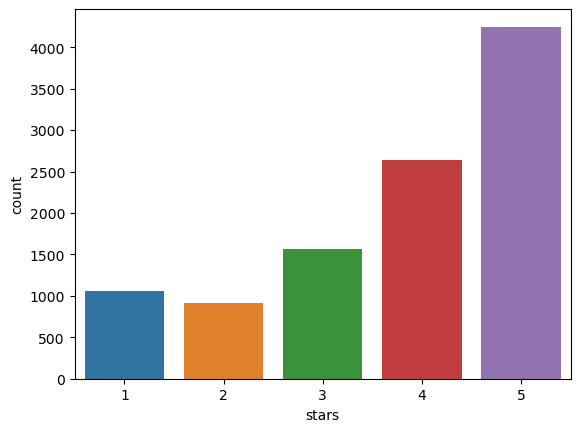

In [31]:
sns.countplot(x=df['stars'])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 6.adım - tokenize et
### 7.adım -lemma ve stema ile ekleri kaldır ve kokleri bul
### 8.adım - vektörize et

In [33]:
vect = CountVectorizer() 

In [34]:
from nltk.tokenize import sent_tokenize
# tokenize- CÜMLEDEKİ kelimeleri ayırmak ve Python listesi haline getirmek için kullanılır

In [35]:
#sent_tokenize(df["text"][10])

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
#df['text'] = df['text'].apply(word_tokenize)

In [38]:
from nltk.tokenize import TreebankWordTokenizer

In [39]:
from nltk.tokenize import BlanklineTokenizer

In [40]:
len(df["text"])

10417

In [41]:
#word_tokenize(df["text"][10])

In [42]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\İrfan
[nltk_data]     Polat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
from textblob import TextBlob

In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [46]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [47]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2), analyzer=lemmafn)

In [48]:
x=yelpbw["text"]
y=yelpbw["stars"]

In [49]:
x=vect.fit_transform(x) #tokenize etme işini de halletmiş oluyoruz

In [50]:
x

<5303x15884 sparse matrix of type '<class 'numpy.int64'>'
	with 400996 stored elements in Compressed Sparse Row format>

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
df[df.stars==3]

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday
9,3,1,0,1,i have been craving getting down with a buffet...,12,7,2013,July,Friday
19,3,2,1,0,i would recommend this buffet to those with an...,11,6,2014,June,Wednesday
21,3,0,0,0,its the king of buffets lots of options and b...,6,6,2017,June,Tuesday
26,3,0,0,0,best part of this buffet were the desserts mai...,9,9,2014,September,Tuesday
32,3,1,0,0,i going to give this place stars im sure ther...,21,6,2015,June,Sunday
...,...,...,...,...,...,...,...,...,...,...
10374,3,0,0,0,this was my favorite vegas buffet it might sti...,19,9,2019,September,Thursday
10385,3,0,1,0,food is good average the meat was a disappoint...,12,10,2019,October,Saturday
10399,3,0,0,0,too long to wait to be seated more than two ho...,28,11,2019,November,Thursday
10400,3,0,0,0,here are the highlights as expected from other...,30,11,2019,November,Saturday


In [53]:
df[df.stars==5]

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday
0,5,0,1,0,after getting food poisoning at the palms hote...,4,12,2012,December,Tuesday
4,5,0,0,0,i would give this infinite stars if i could my...,28,7,2015,July,Tuesday
5,5,0,0,0,really enjoyed everything they had to offer it...,1,4,2015,April,Wednesday
8,5,0,0,0,lots of choices good service line wasnt as lon...,27,3,2017,March,Monday
10,5,2,0,0,best buffet as of march beats wicked spoon an...,1,4,2014,April,Tuesday
...,...,...,...,...,...,...,...,...,...,...
10408,5,4,1,3,the bacchanal buffet is in my opinion the best...,9,12,2017,December,Saturday
10409,5,1,0,0,we went to bacchanal on easter sunday as it wa...,28,4,2019,April,Sunday
10411,5,0,0,0,every time we visit las vegas we go to this bu...,5,12,2019,December,Thursday
10412,5,0,0,0,best buffet ever irma was great served us bett...,17,11,2019,November,Sunday


In [54]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,19))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [56]:
one = df[df['stars']==1]["text"]

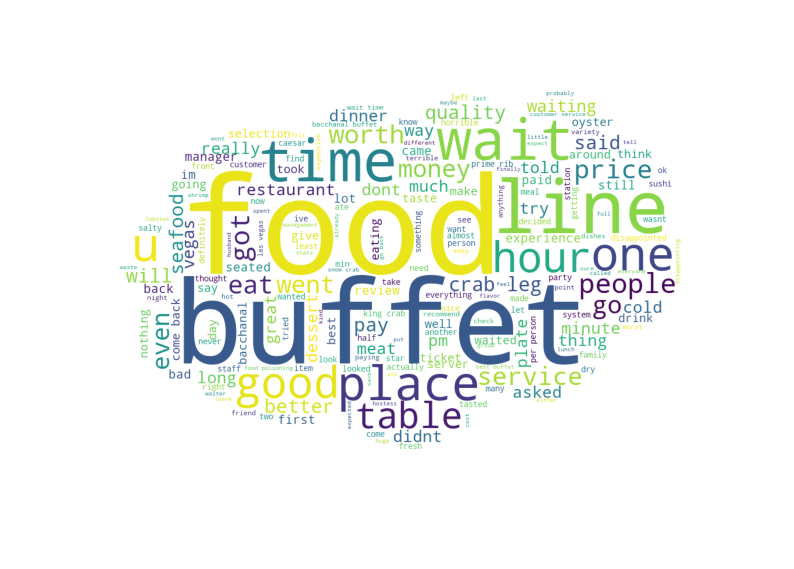

In [57]:
wc(one,'white')

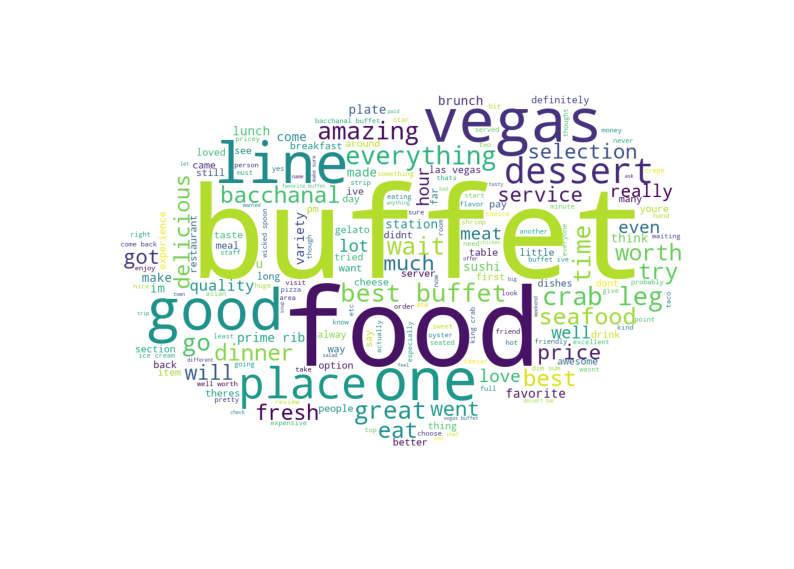

In [58]:
five=df[df['stars']==5]["text"]
wc(five,'white')

## <font color=red> Sentiment Analiz 

In [59]:
yelpbw = df[(df.stars==1)|(df.stars==5)]
#1yıldızsa aşırı negatif 5 yıldızsa aşırı pozitif

In [60]:
yelpbw.reset_index(drop=True, inplace=True)

In [61]:
yelpbw.head()

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday
0,5,0,1,0,after getting food poisoning at the palms hote...,4,12,2012,December,Tuesday
1,1,0,0,0,not worth it too salty food and expensive this...,19,12,2016,December,Monday
2,5,0,0,0,i would give this infinite stars if i could my...,28,7,2015,July,Tuesday
3,5,0,0,0,really enjoyed everything they had to offer it...,1,4,2015,April,Wednesday
4,5,0,0,0,lots of choices good service line wasnt as lon...,27,3,2017,March,Monday


In [62]:
import seaborn as sns

<AxesSubplot:xlabel='stars', ylabel='count'>

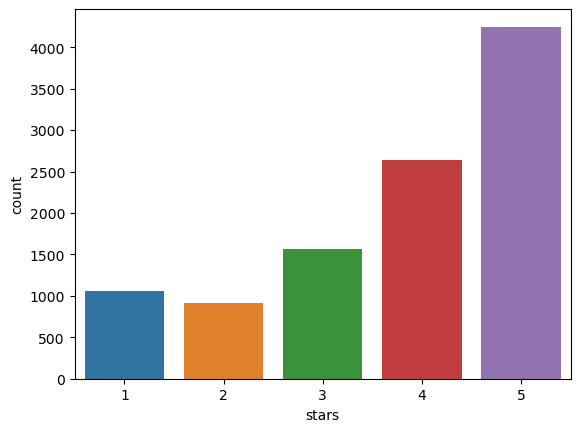

In [63]:
sns.countplot(x=df['stars'])

In [64]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [65]:
df['sentiment']=df['text'].apply(detect_sentiment)

In [66]:
df.sentiment.value_counts()

 0.500000    79
 0.000000    74
 0.300000    46
 0.250000    42
 0.400000    38
             ..
-0.011111     1
 0.405556     1
-0.146667     1
-0.096111     1
 0.185185     1
Name: sentiment, Length: 7907, dtype: int64

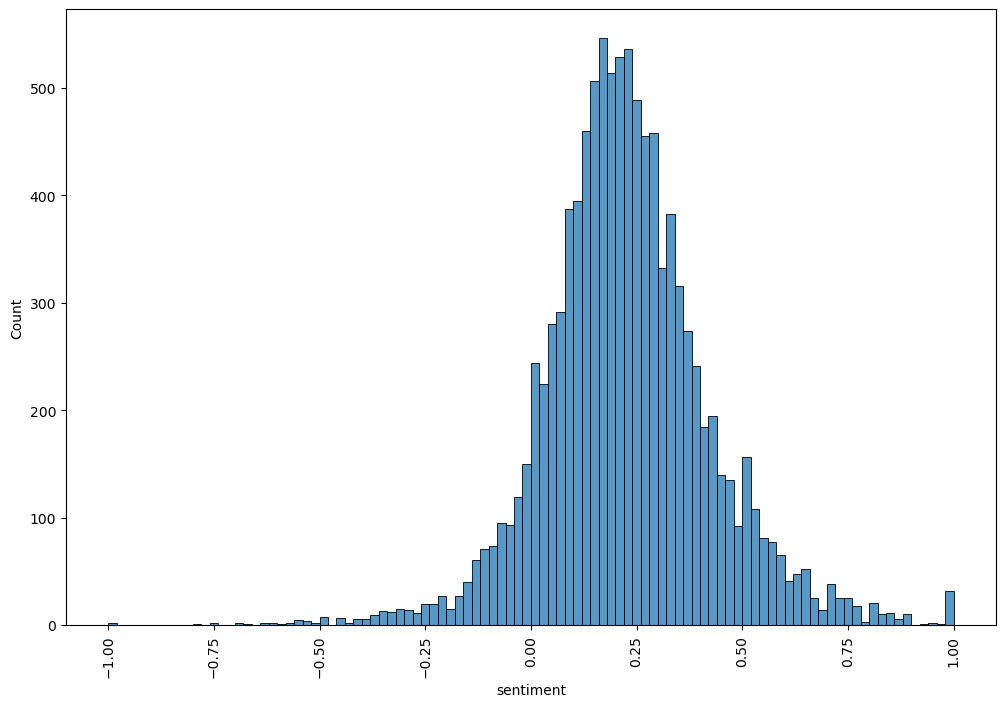

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['sentiment'])
plt.xticks(rotation=90);

In [68]:
# 0 nötr, 1 pozitif, 2negative
def sntmnt(score):
    if score>0.2:
        return 1
    elif score>-0.2:
        return 2
    else:
        return 0

In [69]:
df['class']=df['sentiment'].apply(sntmnt)

<AxesSubplot:xlabel='class', ylabel='count'>

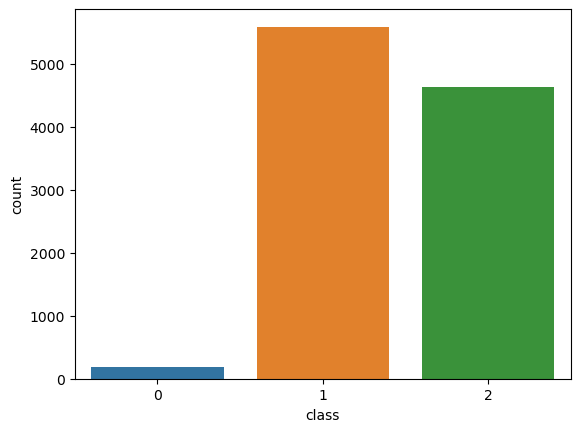

In [70]:
sns.countplot(x=df['class'])

In [71]:
df

,stars,useful,funny,cool,text,Day,Month,Year,month_name,weekday,sentiment,class
0,5,0,1,0,after getting food poisoning at the palms hote...,4,12,2012,December,Tuesday,0.337330,1
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,17,1,2014,January,Friday,0.219409,1
2,4,1,1,1,the crab legs are better than the ones at wick...,8,6,2015,June,Monday,-0.134722,2
3,1,0,0,0,not worth it too salty food and expensive this...,19,12,2016,December,Monday,-0.325000,0
4,5,0,0,0,i would give this infinite stars if i could my...,28,7,2015,July,Tuesday,0.362500,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,5,0,0,0,best buffet ever irma was great served us bett...,17,11,2019,November,Sunday,0.543750,1
10413,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,12,11,2019,November,Tuesday,0.210101,1
10414,5,0,0,0,the selection is amazing and all the food is e...,12,12,2019,December,Thursday,0.480000,1
10415,4,1,1,2,one of the best buffets ive had in vegas my on...,1,11,2019,November,Friday,0.185185,2


In [72]:
df=df.drop(df[["month_name","weekday"]],axis=1)

In [73]:
df

,stars,useful,funny,cool,text,Day,Month,Year,sentiment,class
0,5,0,1,0,after getting food poisoning at the palms hote...,4,12,2012,0.337330,1
1,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,17,1,2014,0.219409,1
2,4,1,1,1,the crab legs are better than the ones at wick...,8,6,2015,-0.134722,2
3,1,0,0,0,not worth it too salty food and expensive this...,19,12,2016,-0.325000,0
4,5,0,0,0,i would give this infinite stars if i could my...,28,7,2015,0.362500,1
...,...,...,...,...,...,...,...,...,...,...
10412,5,0,0,0,best buffet ever irma was great served us bett...,17,11,2019,0.543750,1
10413,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,12,11,2019,0.210101,1
10414,5,0,0,0,the selection is amazing and all the food is e...,12,12,2019,0.480000,1
10415,4,1,1,2,one of the best buffets ive had in vegas my on...,1,11,2019,0.185185,2


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

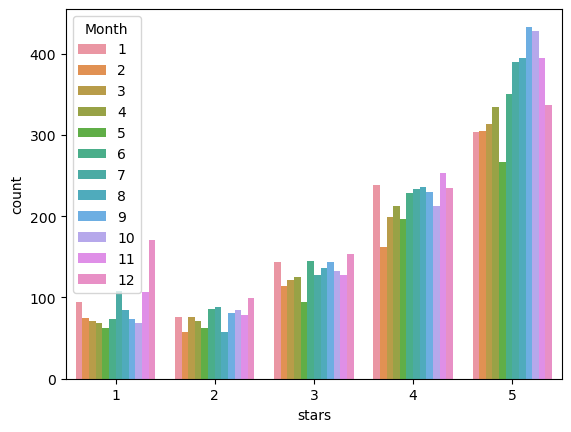

In [74]:
sns.countplot(df["stars"],hue=df.Month)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

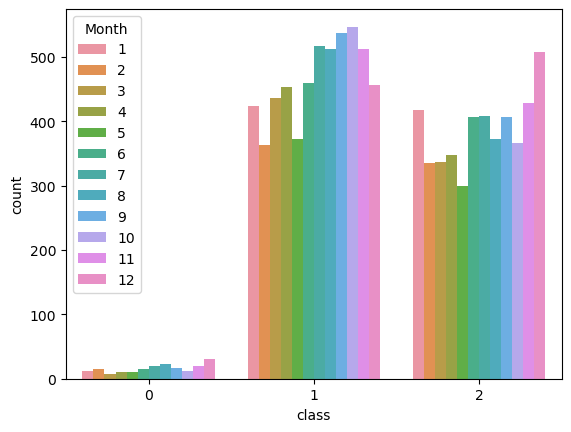

In [75]:
sns.countplot(df["class"],hue=df.Month)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

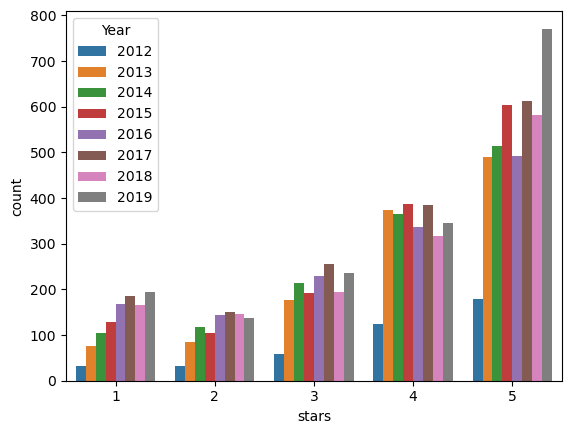

In [76]:
sns.countplot(df.stars,hue=df.Year)

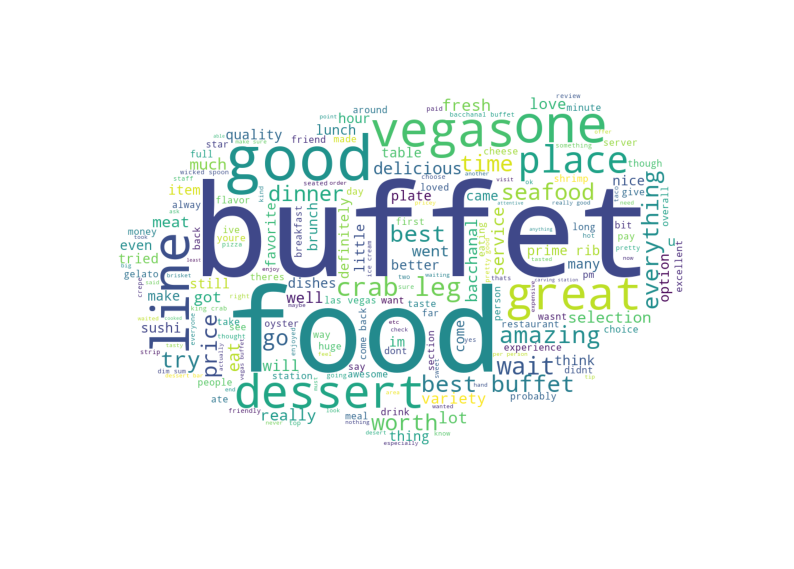

In [77]:
posi=df[df['class']==1]["text"]
wc(posi,'white')

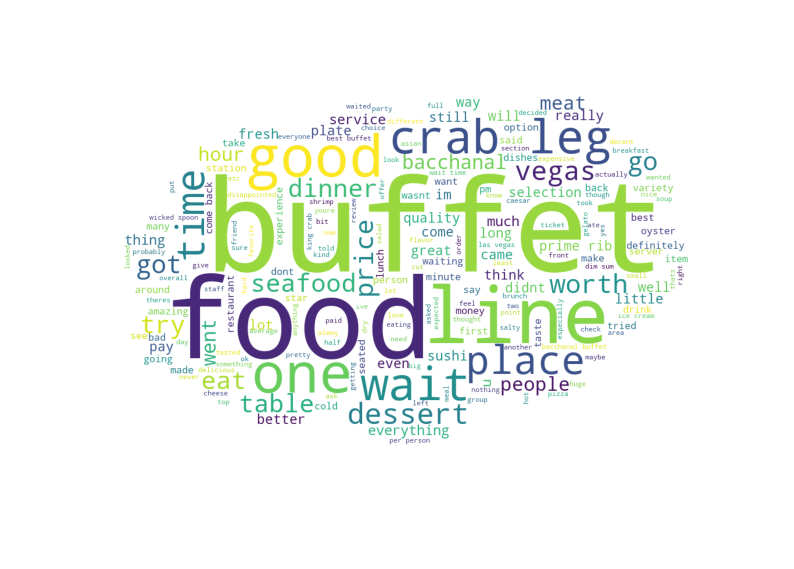

In [78]:
negative=df[df['class']==2]["text"]
wc(negative,'white')

<AxesSubplot:>

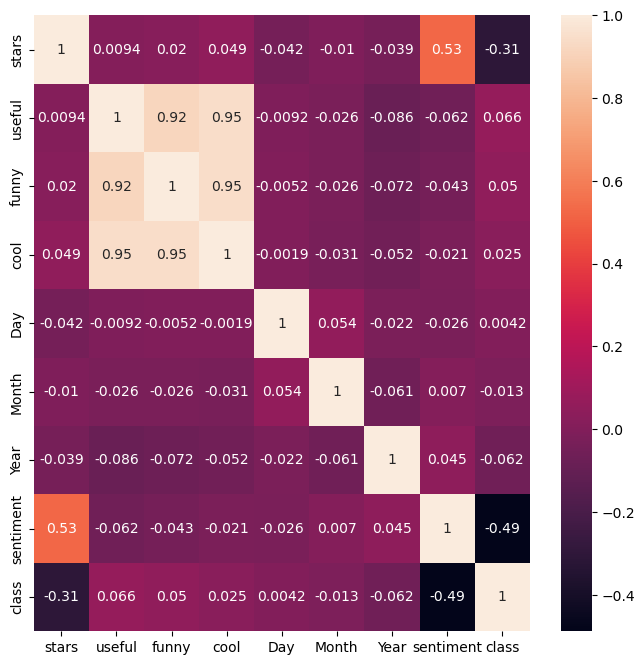

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [80]:
df["stars"].unique

<bound method Series.unique of 0        5
1        4
2        4
3        1
4        5
        ..
10412    5
10413    4
10414    5
10415    4
10416    4
Name: stars, Length: 10417, dtype: int64>

In [81]:
import spacy
from spacy import displacy
NER = spacy.load('en_core_web_sm')

In [82]:
en=NER(df["text"][19])

In [83]:
for word in en.ents:
    print(word.text,word.label)

kobe 384
half 397
italy 384
mexican 381
dessert 380
the end of the 391


In [84]:
displacy.render(en, style='ent', jupyter=True)

## <font color=blue> Classification

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

### LogisticRegression

In [87]:
l=LogisticRegression()
l.fit(x_train, y_train)
pred=l.predict(x_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
accuracy_score(pred, y_test)

0.9604147031102733

### Random Forest Classifier

In [89]:
rgc= RandomForestClassifier()
rgc.fit(x_train,y_train)
pred=rgc.predict(x_test)

In [90]:
accuracy_score(pred, y_test)

0.8850141376060321

### GradientBoostingClassifier

In [91]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [92]:
accuracy_score(pred, y_test)

0.9302544769085768